# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd # Importing pandas library for data manipulation
dataset = pd.read_csv('Bank_cleaned.csv') # Reading the dataset from a CSV file

In [6]:
dataset.head() # Displaying the first 5 rows of the dataset to check data structure, column names, and sample values

,Client,Age,Job,Marital,Education,Balance,Housing,Loan,Duration,Campaign,deposit
0,1,59,8,3,2,2343,1,0,1042,1,1
1,2,56,8,3,2,45,0,0,1467,1,1
2,3,41,7,3,2,1270,1,0,1389,1,1
3,4,55,6,3,2,2476,1,0,579,1,1
4,5,54,8,3,3,184,0,0,673,2,1


In [5]:
# Information about the dataset:
# The dataset contains 11,162 rows.
# It has 11 columns.

dataset.info  # Checking dataset summary for types and null values.

<bound method DataFrame.info of        Client  Age  Job  Marital   Education  Balance  Housing  Loan  \
0           1   59    8         3          2     2343        1     0   
1           2   56    8         3          2       45        0     0   
2           3   41    7         3          2     1270        1     0   
3           4   55    6         3          2     2476        1     0   
4           5   54    8         3          3      184        0     0   
...       ...  ...  ...       ...        ...      ...      ...   ...   
11157   11158   33    5         2          1        1        1     0   
11158   11159   39    6         3          2      733        0     0   
11159   11160   32    7         2          2       29        0     0   
11160   11161   43    7         3          2        0        0     1   
11161   11162   34    7         3          2        0        0     0   

       Duration  Campaign  deposit  
0          1042         1        1  
1          1467         1    

### Getting the inputs and output

In [3]:
X = dataset.iloc[:,1:-1].values # Extracting feature columns from the dataset (all except the first and last)
y = dataset.iloc[:,-1].values # Extracting the target variable from the last column

In [4]:
X # Displaying the feature matrix for verification

array([[  59,    8,    3, ...,    0, 1042,    1],
       [  56,    8,    3, ...,    0, 1467,    1],
       [  41,    7,    3, ...,    0, 1389,    1],
       ...,
       [  32,    7,    2, ...,    0,  156,    2],
       [  43,    7,    3, ...,    1,    9,    2],
       [  34,    7,    3, ...,    0,  628,    1]])

In [5]:
y # Displaying the target variable for verification

array([1, 1, 1, ..., 0, 0, 0])

### Creating the Training Set and the Test Set

In [6]:
from sklearn.model_selection import train_test_split # Importing function to split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Splitting data into 80% training and 20% testing

In [7]:
X_train  # Displaying training set features for inspection

array([[ 49,  10,   3, ...,   0, 285,   1],
       [ 59,   3,   1, ...,   0, 261,   1],
       [ 33,   5,   3, ...,   0, 984,   5],
       ...,
       [ 36,  10,   3, ...,   0,  14,   8],
       [ 31,   8,   3, ...,   0, 226,   1],
       [ 60,   3,   3, ...,   0, 728,   1]])

In [8]:
X_test# Displaying test set features for inspection

array([[  41,    6,    3, ...,    0,  105,    1],
       [  56,    7,    3, ...,    1,  229,    1],
       [  30,    6,    2, ...,    1,  187,    2],
       ...,
       [  35,    2,    3, ...,    0, 1555,    2],
       [  53,    8,    2, ...,    0,   67,    1],
       [  40,    6,    3, ...,    0,  329,    2]])

In [9]:
y_train # Displaying training set target values

array([0, 1, 1, ..., 0, 0, 1])

In [10]:
y_test # Displaying test set target values

array([0, 1, 0, ..., 1, 1, 0])

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for feature scaling
sc = StandardScaler() # Creating a StandardScaler object
X_train = sc.fit_transform(X_train) # Scaling the training set for standardized data

In [12]:
X_train # Displaying the scaled training set

array([[ 0.64941897,  1.18780238,  0.78368235, ..., -0.39003722,
        -0.2483547 , -0.56394809],
       [ 1.48737591, -1.48284088, -2.09417071, ..., -0.39003722,
        -0.31759131, -0.56394809],
       [-0.69131213, -0.71979995,  0.78368235, ..., -0.39003722,
         1.76816153,  0.92827075],
       ...,
       [-0.43992505,  1.18780238,  0.78368235, ..., -0.39003722,
        -1.03015141,  2.04743488],
       [-0.85890352,  0.42476145,  0.78368235, ..., -0.39003722,
        -0.41856137, -0.56394809],
       [ 1.57117161, -1.48284088,  0.78368235, ..., -0.39003722,
         1.0296377 , -0.56394809]])

## Part 2 - Building and training the model

### Building the model

In [13]:
from sklearn.linear_model import LogisticRegression # Importing logistic regression model from sklearn
model = LogisticRegression(random_state = 0) # Initializing the logistic regression model with a fixed random state for reproducibility

### Training the model

In [14]:
model.fit(X_train, y_train) # Fitting the logistic regression model to the training data

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [15]:
y_pred = model.predict(sc.transform(X_test)) # Scaling test set features and predicting target values

In [16]:
print(y_pred) # Displaying the predicted values for the test set

[0 0 0 ... 1 0 0]


Making the prediction of a single data point with:

Client No. 1:
1. Age = 59
2. Job = 8
3. Marital = 3
4. Education = 2
5. Balance = 2343
6. Housing = 1
7. Loan = 0
8. Duration = 1024
9. Campaign = 1

In [29]:
print(model.predict(sc.transform([[59,8,3,2,2343,1,0,1042,1]]))) # Predicting the target value for the specified data point


[1]


## Part 3: Evaluating the model 

### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix # Importing confusion matrix function for model evaluation
conf_matrix = confusion_matrix(y_test, y_pred) # Generating confusion matrix for actual vs predicted values
print(conf_matrix) # Displaying the confusion matrix values

[[968 237]
 [274 754]]


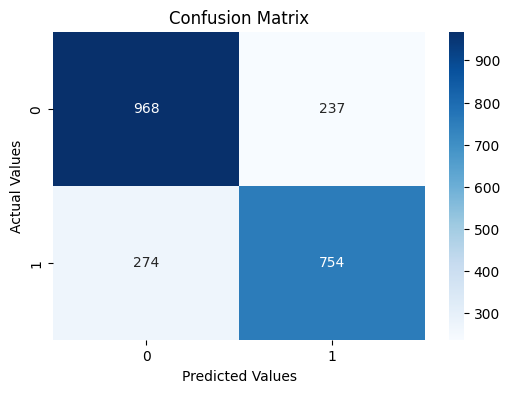

In [32]:
import matplotlib.pyplot as plt # Importing matplotlib for plotting
import seaborn as sns # Importing seaborn for better data visualization

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4)) # Setting figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') # Creating a heatmap for the confusion matrix
plt.title('Confusion Matrix') # Adding a title to the plot
plt.ylabel('Actual Values') # Labeling y-axis as actual values
plt.xlabel('Predicted Values') # Labeling x-axis as predicted values
plt.show() # Displaying the confusion matrix plot

### Accuracy

In [33]:
(968+754)/(968+754+274+237) # Manually calculating model accuracy using confusion matrix values through accuracy formula.

0.7711598746081505

In [34]:
from sklearn.metrics import accuracy_score # Importing accuracy score function
accuracy_score(y_test,y_pred) # Calculating and displaying the accuracy of the model using sklearn's accuracy_score

0.7711598746081505